<a href="https://colab.research.google.com/github/BhagyaRekhaSunkavalli/AI-ML/blob/main/AI_ML_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import graphviz

In [15]:
df = pd.read_csv("/content/heart.csv")

In [17]:
X = df.iloc[:, :-1]
y = df["target"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns, class_names=["No Heart Disease", "Heart Disease"], filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


Decision Tree Accuracy: 0.78


'decision_tree.pdf'

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.99


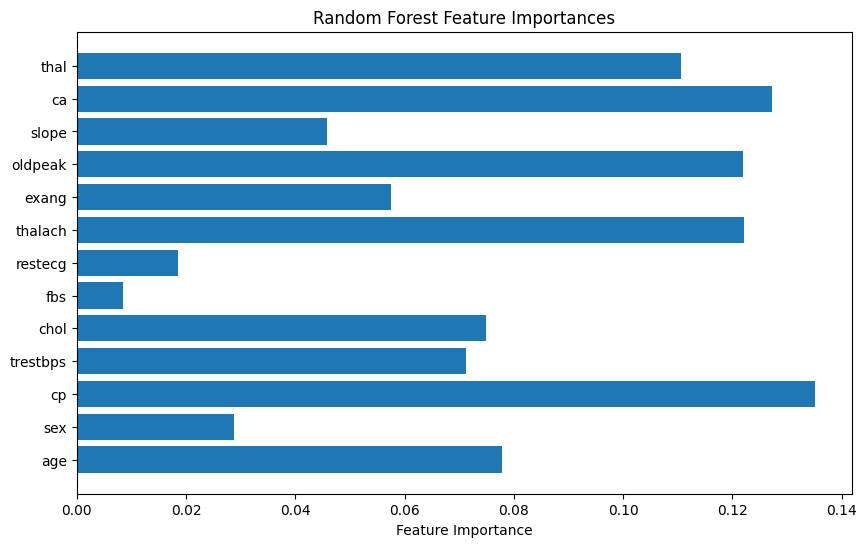

In [26]:
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [32]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validation Accuracy: {np.mean(cv_scores):.2f}")

Cross-validation Accuracy: 1.00
